# Images with Pillow

So we are gonna be doing some image processing with Pillow, for whatever reason. Apparently mostly OpenCV is used for work in Computer vision problem solving but hey ho.

In [13]:
# first import libs
from PIL import Image
import os
import matplotlib.pyplot as plt

In [14]:
# get current working directory
cwd = os.getcwd()
# img filename
img_file = "mountain.jpeg"
# create path
img_path = os.path.join(cwd,img_file)

# get image
img = Image.open(img_path)

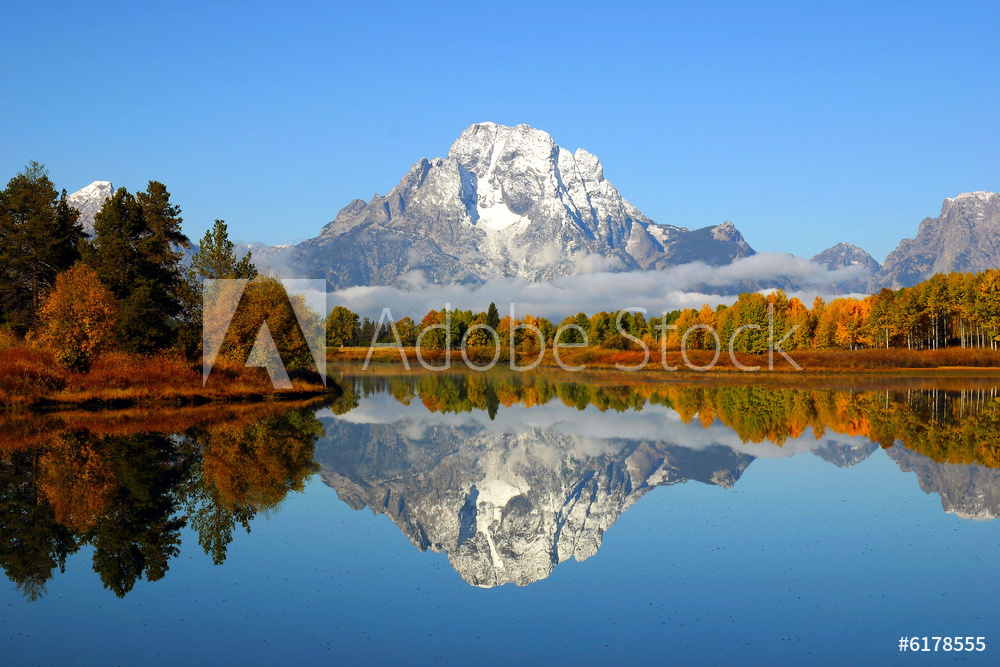

In [15]:
# sanity check
type(img)
img

In [16]:
# plot the image (show in gallery)
img.show()

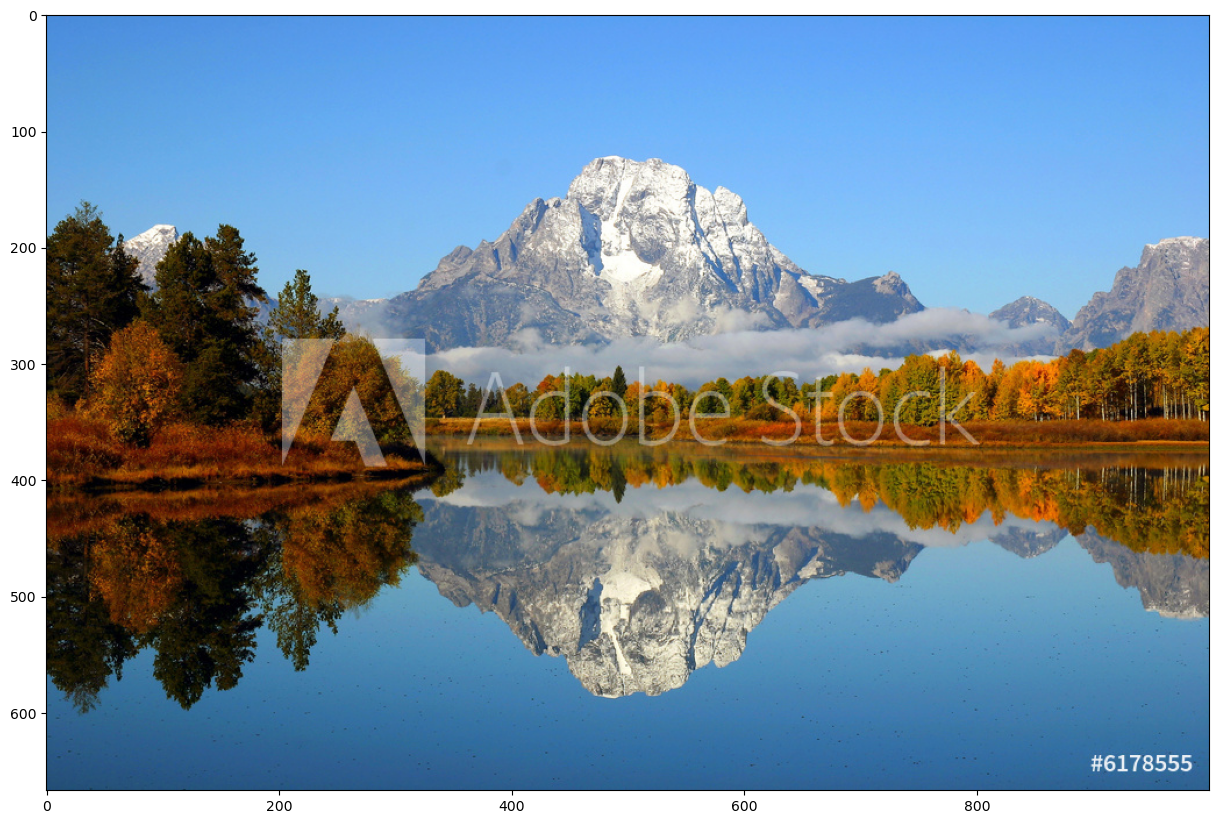

In [18]:
# the imshow method from matplotlib can also be used to show the img
plt.figure(figsize=(15,15))
plt.imshow(img)
plt.show()

In [19]:
# show img dimensions x * y
img.size

(1000, 667)

In [20]:
# the mode attribute shows the pixel format used
img.mode

'RGB'

In [21]:
# the open method does not load the img into memory, this can be
# done with img.load()
img_loaded = img.load()

In [22]:
img_loaded

In [23]:
# after the img is loaded, the intensity of color values
# at each pixel can be checked
def pixel_vals(x,y,image):
    return image[y,x]

In [24]:
pixel_vals(132,55,img_loaded)

(105, 171, 229)

In [25]:
# the img can be saved using the save method
img.save("mountain_saved.jpeg")


### Grayscale, Qunatization and Color Channels

The ImageOps module has a bunch of helpers for manipulating the img

In [26]:
from PIL import ImageOps

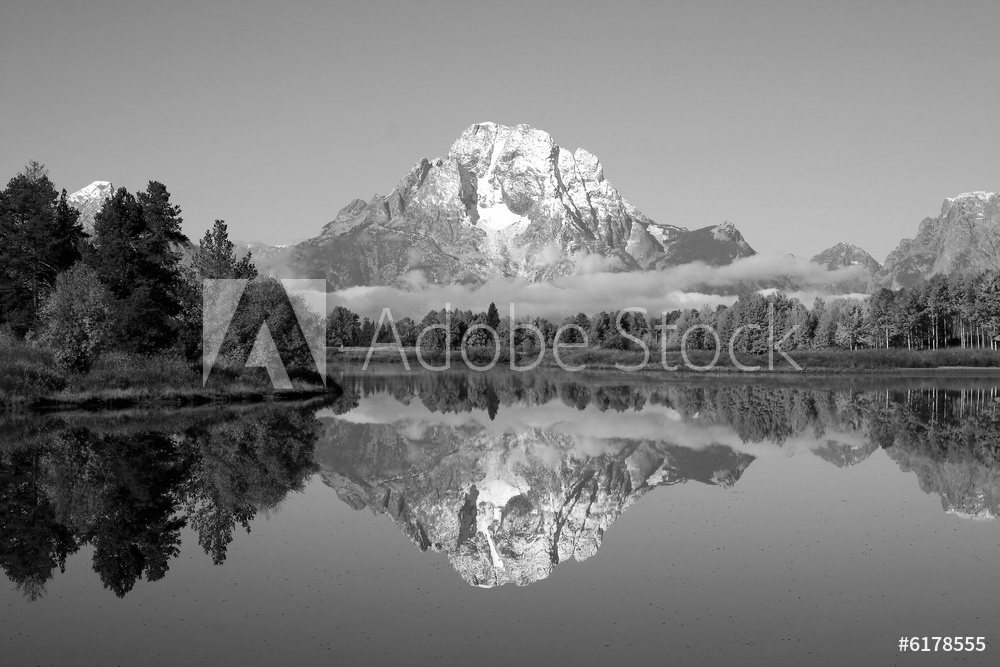

In [27]:
grey_img = ImageOps.grayscale(img)
grey_img

In [28]:
# the mode for grayscale is L - Luminence
grey_img.mode

'L'

In [29]:
grey_img.save("grey_mountain.jpeg")

### Quantization

* Quantization is the number of unique values for any given pixel.
* At most a channel can have 256 different values.
* The Quantize method can be used to change this

In [31]:
grey_img_reduced = grey_img.quantize(256 // 2)
grey_img_reduced.show()

### Color Channels

Different Color Channels can be opened, first splitting the img into its component channels

In [32]:
r,g,b = img.split()

In [38]:
# define a function to show all images side by side
def img_concat(im1,im2,im3):
    frame = Image.new("RGB", (im1.width + im2.width + im3.width, im1.height))
    frame.paste(im1, (0,0))
    frame.paste(im2,(im1.width,0))
    frame.paste(im3, (im1.width + im2.width,0))
    return frame

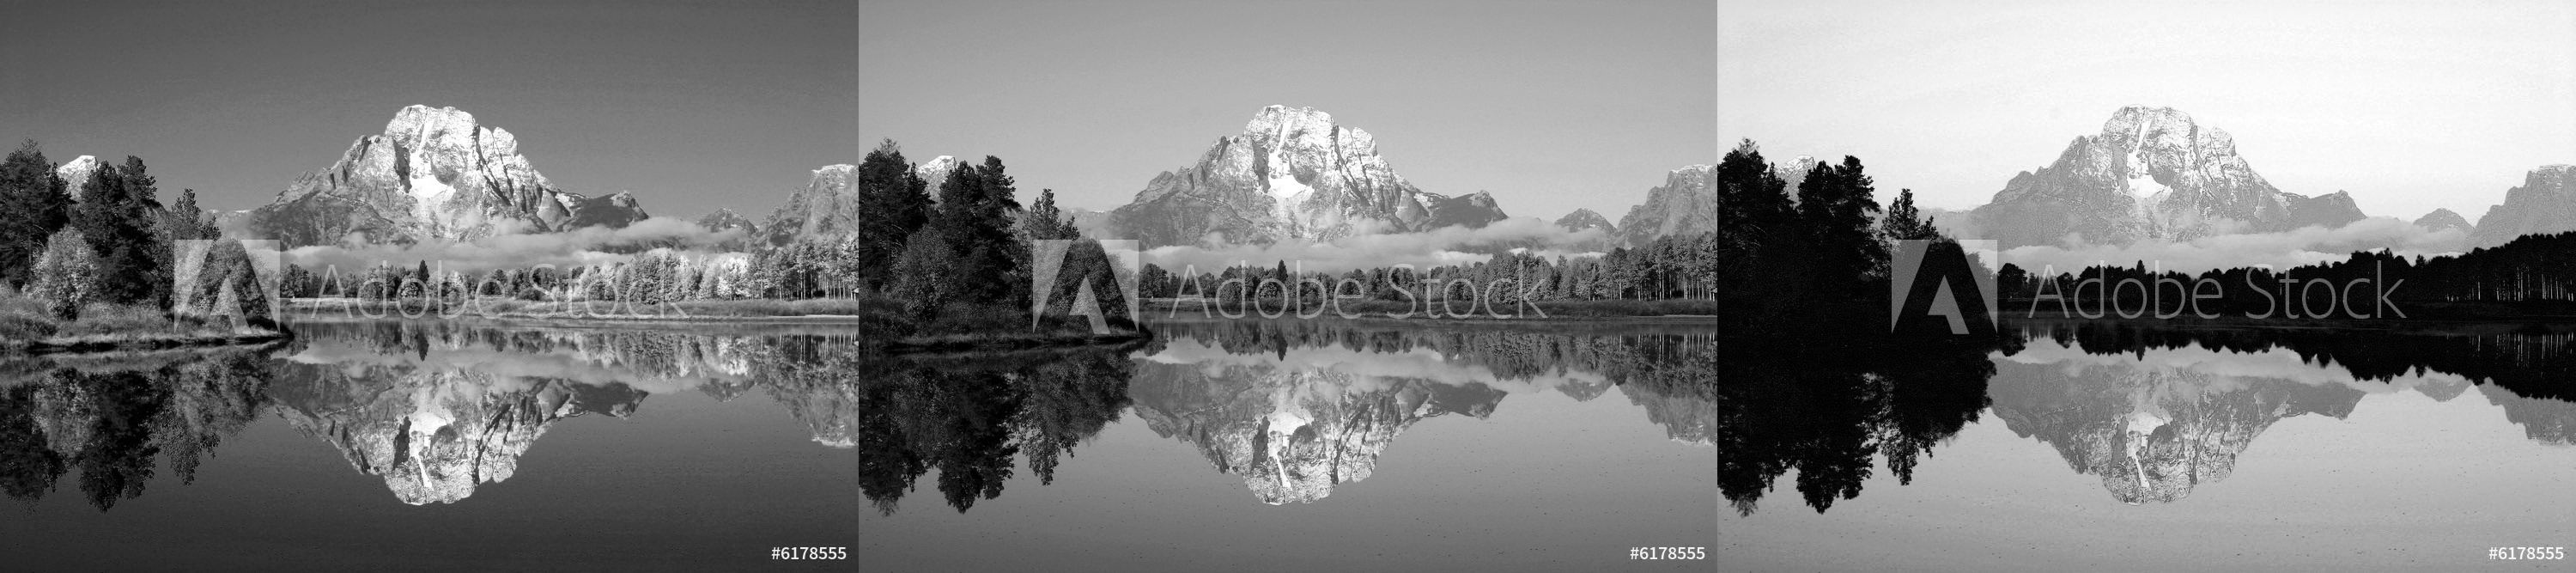

In [39]:
img_concat(r,g,b)

### Images as Arrays

Numpy can work with the values of images because Numpy is amazing like that. Simply use the array function or asarray() method.

In [40]:
# import numpy
import numpy as np

In [41]:
arr = np.asarray(img)

In [51]:
# sanity check
print(f"Type of array: {type(arr)}\nArray Dimensions: {arr.shape}")

Type of array: <class 'numpy.ndarray'>
Array Dimensions: (667, 1000, 3)


the dimensions show us:
* Rows
* Columns
* Channels

Respectively

In [53]:
# othe numpy operations can be performed as normal
print(f"Min Val: {arr.min()}\nMax Val: {arr.max()}\nMean Val: {arr.mean()}")

Min Val: 0
Max Val: 255
Mean Val: 126.07172063968017


### Indexing

The array can of course be plotted using matplotlib

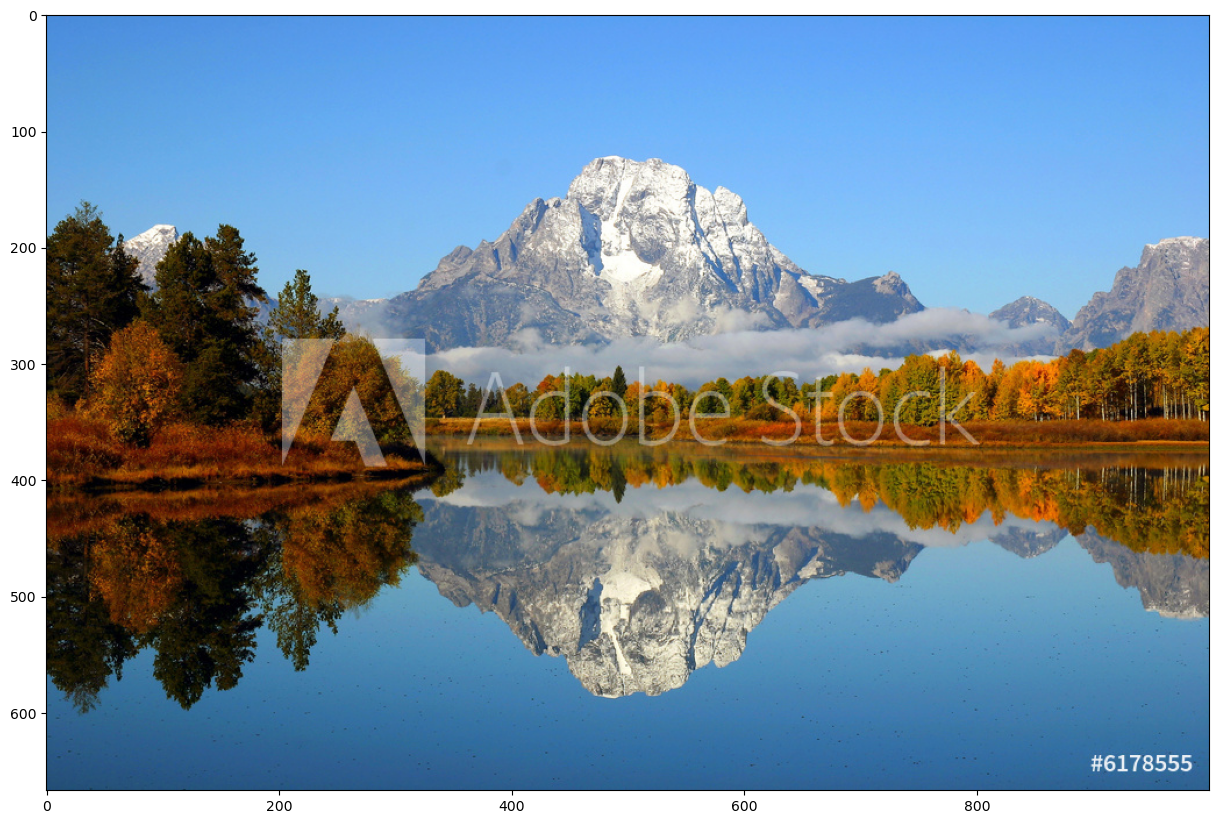

In [54]:
plt.figure(figsize=(15,15))
plt.imshow(arr)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

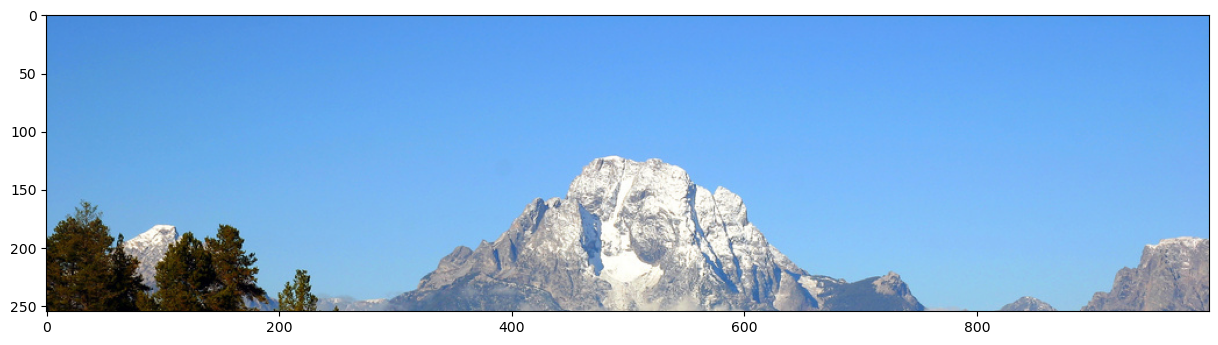

In [55]:
# images can be sliced using indexing
plt.figure(figsize=(15,15))
plt.imshow(arr[0:255,:,:])
plt.show

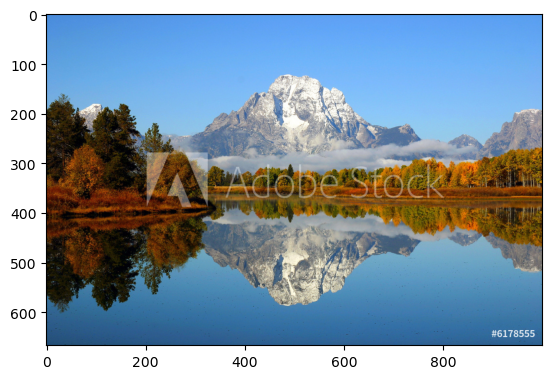

In [56]:
# to reassign the img, use copy rather than assigning simply to
# another variable as this is a pointer to the same memery loc

A = img.copy()
plt.imshow(A)
plt.show()